<a href="https://colab.research.google.com/github/ektaarora3501/machine-learning/blob/master/sklearn_classify_handwritingdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
mnist =load_digits()
print(mnist)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [0]:
X,y=mnist["data"],mnist["target"]
X.shape

(1797, 64)

The above shpae of x shows there are 1797 images each with 64 features.This is so because ever image is 8*8 pixles


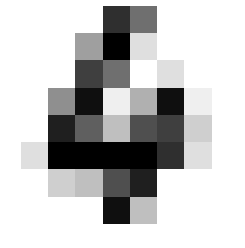

In [0]:
some_digits=X[800]
some_digit_image=some_digits.reshape(8,8)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()
print(y[800])

Here we basically imported a particular data image X[800] reshaped it to 8*8 and looked out what was actual output available in dataset for the given image i.e. y[800]

In [0]:
X_train,X_test,y_train,y_test=X[:1600],X[1600:],y[:1600],y[1600:]
shuffle_index=np.random.permutation(1600)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]
y_train_4=(y_train==4)
y_test_4=(y_train==4)

In [0]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_4)
print(sgd_clf.predict([some_digits]))


[ True]


In the above two blocks we classified data into train and test set .Data is shuffled using *np.random.permutation* .Futher data is made to fit on stochastic gradient classifier for classifing whether the image is 4 or not.

In [0]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf,X_train,y_train_4,cv=3,scoring="accuracy"))

[0.99625468 0.99437148 0.99624765]


In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_4,cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_4,y_train_pred)

array([[1437,    4],
       [   3,  156]])

here we create a confusion matrix to actually check for how much correct model is working on.The confusion matrix is basically a 2*2 array with specifications as shown
first 0,0 -> true negative
0,1-> false positive
1,0-> false negative
1,1->true positives



In [0]:
from sklearn.metrics import f1_score
f1_score(y_train_4,y_train_pred)

0.9780564263322885